In [1]:
import PreReclaim

### 1차 실험
- 실험 순서: browser, apps, mycontents, search-all, sechdule-manger, youtube, amazon, netflix
- 실험 후처리: browser는 초기에 메모리 차지하는 역할으로 하고 결과에서 제거한다.
- 실험 결과: 개선효과 없음
- 원인
 - 1) PR enable 에서 amazon/netflix 실행시 swap-in 동작으로 2배 이상 느려짐
 - 2) 메모리 사용량이 늘어날 수록 swap 이 커짐, 
 - 3) 메모리 사용량이 늘어날 수록 preloading 된 앱은 swap 되어 있을 확률이 커짐

In [2]:
files = ["../log/20170523/pr_disabled_20170523_110031.txt",
         "../log/20170523/pr_disabled_20170523_123910.txt",
         "../log/20170523/pr_disabled_20170523_125808.txt",
         "../log/20170523/pr_enabled_20170523_111231.txt",
         "../log/20170523/pr_enabled_20170523_120319.txt",
         "../log/20170523/pr_enabled_20170523_122941.txt"]
cols = ['browser', 'apps', 'mycontents' , 'search-all', 'schedule-manager', 'youtube', 'amazon', 'netflix']
df = PreReclaim.show_result(files, cols)
df.drop(['browser', 'sum'], axis=1, inplace=True)
df['sum'] = df.sum(axis=1)
df

,apps,mycontents,search-all,schedule-manager,youtube,amazon,netflix,file,sum
0,12.5,6.2,5.1,4.4,3.0,7.1,2.8,../log/20170523/pr_disabled_20170523_110031.txt,41.1
1,13.1,7.1,5.1,4.4,3.1,15.7,3.4,../log/20170523/pr_disabled_20170523_123910.txt,51.9
2,13.2,7.3,6.4,4.8,2.8,6.9,4.1,../log/20170523/pr_disabled_20170523_125808.txt,45.5
3,12.6,7.1,5.5,4.5,2.3,16.0,3.4,../log/20170523/pr_enabled_20170523_111231.txt,51.4
4,12.5,6.4,4.5,3.9,2.5,16.7,4.0,../log/20170523/pr_enabled_20170523_120319.txt,50.5
5,12.4,6.1,5.1,3.8,2.5,16.0,3.1,../log/20170523/pr_enabled_20170523_122941.txt,49.0


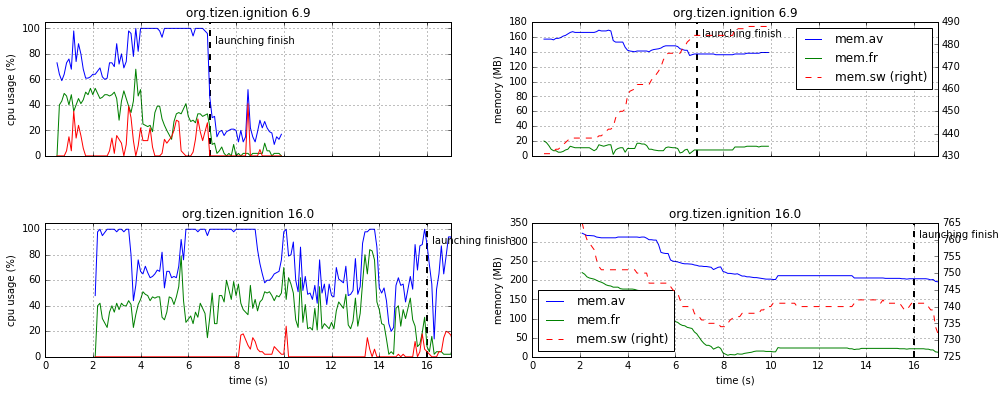

In [3]:
PreReclaim.compare("../log/20170523/pr_disabled_20170523_125808.txt", 
                   "../log/20170523/pr_enabled_20170523_111231.txt", 
                   6)

### 2차 실험
- 실험 순서: google_play, apps, mycontents, search-all, sechdule-manger, youtube, amazon, netflix
- 실험 결과: 개선효과 없음
- 원인: 
 - 1) google play 런칭시간에 일관성이 없음
 - 2) google play가 bg로 가면 mem free를 너무 많이 해서 다음 앱이 kswapd 영향을 안받음

In [11]:
files = ["../log/20170523/pr_disabled_20170523_131814.txt",
         "../log/20170523/pr_disabled_20170523_133548.txt",
         "../log/20170523/pr_disabled_20170523_135645.txt",
         "../log/20170523/pr_enabled_20170523_132545.txt",
         "../log/20170523/pr_enabled_20170523_134340.txt",
         "../log/20170523/pr_enabled_20170523_140550.txt"]
cols = ['google_play', 'apps', 'mycontents' , 'search-all', 'schedule-manager', 'youtube', 'amazon', 'netflix']
df = PreReclaim.show_result(files, cols)
df

,google_play,apps,mycontents,search-all,schedule-manager,youtube,amazon,netflix,file,sum
0,24.2,12.1,6.7,5.5,4.3,2.9,16.4,4.0,../log/20170523/pr_disabled_20170523_131814.txt,76.1
1,23.1,12.5,6.9,5.8,4.4,2.6,15.0,3.5,../log/20170523/pr_disabled_20170523_133548.txt,73.8
2,19.1,12.5,6.4,4.7,4.0,3.6,16.0,3.9,../log/20170523/pr_disabled_20170523_135645.txt,70.2
3,22.2,12.2,6.6,5.5,4.3,2.2,13.7,3.6,../log/20170523/pr_enabled_20170523_132545.txt,70.3
4,21.7,12.1,6.9,5.3,3.7,2.2,14.7,4.0,../log/20170523/pr_enabled_20170523_134340.txt,70.6
5,23.3,12.4,7.2,5.4,3.6,2.2,15.6,3.5,../log/20170523/pr_enabled_20170523_140550.txt,73.2


 - googleplay 빼면 어느정도 개선됨

In [12]:
df.drop(['google_play', 'sum'], axis=1, inplace=True)
df['sum'] = df.sum(axis=1)
df

,apps,mycontents,search-all,schedule-manager,youtube,amazon,netflix,file,sum
0,12.1,6.7,5.5,4.3,2.9,16.4,4.0,../log/20170523/pr_disabled_20170523_131814.txt,51.9
1,12.5,6.9,5.8,4.4,2.6,15.0,3.5,../log/20170523/pr_disabled_20170523_133548.txt,50.7
2,12.5,6.4,4.7,4.0,3.6,16.0,3.9,../log/20170523/pr_disabled_20170523_135645.txt,51.1
3,12.2,6.6,5.5,4.3,2.2,13.7,3.6,../log/20170523/pr_enabled_20170523_132545.txt,48.1
4,12.1,6.9,5.3,3.7,2.2,14.7,4.0,../log/20170523/pr_enabled_20170523_134340.txt,48.9
5,12.4,7.2,5.4,3.6,2.2,15.6,3.5,../log/20170523/pr_enabled_20170523_140550.txt,49.9


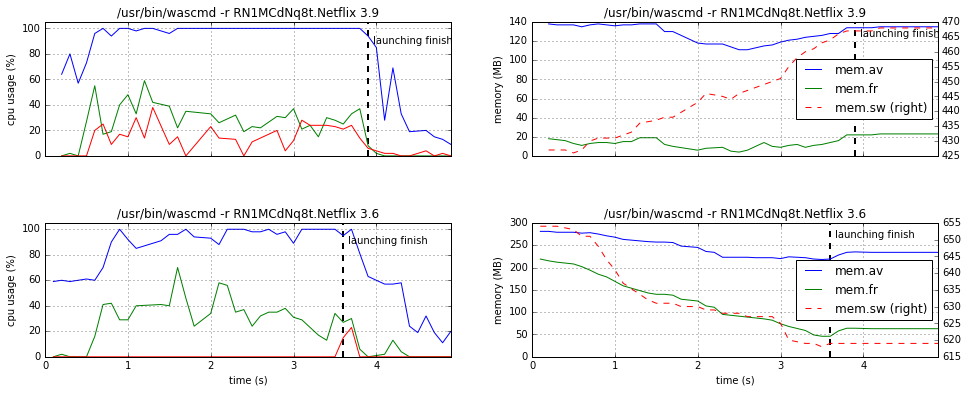

In [36]:
PreReclaim.compare("../log/20170523/pr_disabled_20170523_135645.txt", 
                   "../log/20170523/pr_enabled_20170523_132545.txt", 
                   7)

### 3차 실험
- 실험 순서: google_play, youtube, youtube 죽임, amazon, netflix, youtube 초기진입
- 실험 결과: 개선효과 없는것으로 나옴
- 원인: 
 - 1) google play가 일관성이 없음
 - 2) Youtube 초기진입 일관성 없음

In [5]:
files = ["../log/20170523/pr_disabled_20170523_142557.txt",
         "../log/20170523/pr_disabled_20170523_144604.txt",
         "../log/20170523/pr_enabled_20170523_143814.txt",
         "../log/20170523/pr_enabled_20170523_145153.txt"]
cols = ['google_play', 'youtube', 'amazon', 'netflix', 'youtube_new']
PreReclaim.show_result(files, cols)

,google_play,youtube,amazon,netflix,youtube_new,file,sum
0,20.0,1.8,13.6,3.0,16.3,../log/20170523/pr_disabled_20170523_142557.txt,54.7
1,23.0,1.7,14.0,2.7,20.1,../log/20170523/pr_disabled_20170523_144604.txt,61.5
2,19.1,1.8,12.9,2.9,12.0,../log/20170523/pr_enabled_20170523_143814.txt,48.7
3,21.7,1.7,12.8,2.9,5.4,../log/20170523/pr_enabled_20170523_145153.txt,44.5


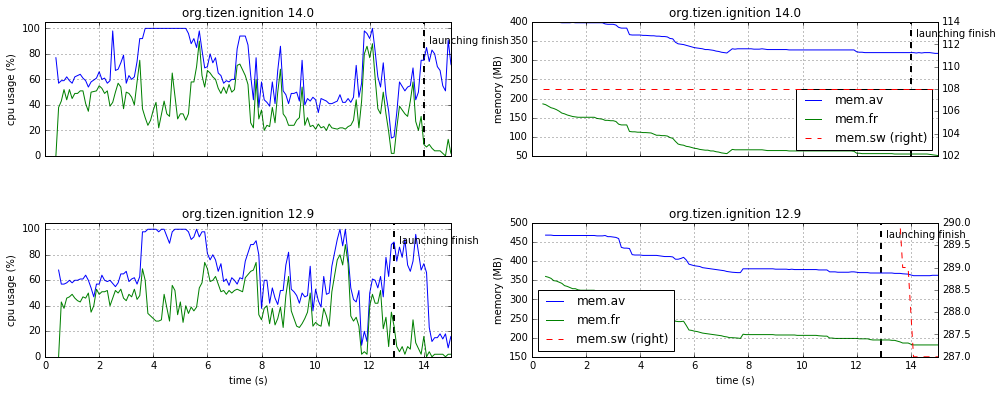

In [23]:
PreReclaim.compare("../log/20170523/pr_disabled_20170523_144604.txt", 
                   "../log/20170523/pr_enabled_20170523_143814.txt", 
                   2)

### 4차 실험
- 실험 순서: google_play, apps, youtube, amazon, netflix, youtube 초기진입
- 실험 결과: 개선효과 있는 것으로 나옴 (하지만 다음 실험에서 실망함)

In [26]:
files = ["../log/20170523/pr_disabled_20170523_151506.txt",
         "../log/20170523/pr_enabled_20170523_152422.txt"]
cols = ['google_play', 'apps', 'youtube', 'amazon', 'netflix', 'youtube_new']
PreReclaim.show_result(files, cols)

,google_play,apps,youtube,amazon,netflix,youtube_new,file,sum
0,22.2,12.7,2.2,13.1,3.8,24.3,../log/20170523/pr_disabled_20170523_151506.txt,78.3
1,18.0,11.6,2.0,14.1,3.7,14.3,../log/20170523/pr_enabled_20170523_152422.txt,63.7


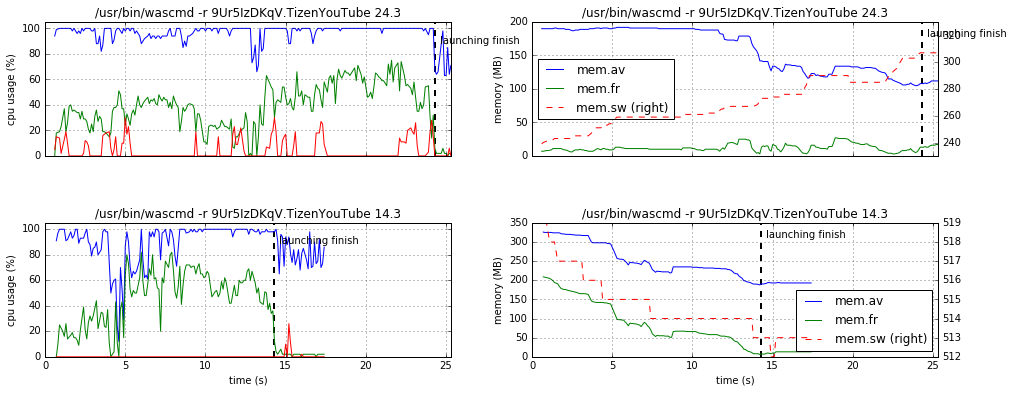

In [27]:
PreReclaim.compare("../log/20170523/pr_disabled_20170523_151506.txt", 
                   "../log/20170523/pr_enabled_20170523_152422.txt", 
                   5)

### 5차 실험
- 실험 설계: 4차 실험에서 google play만 제거하고 테스트
- 실험 순서: apps, youtube, amazon, netflix, youtube 초기진입
- 실험 결과: PR disable 에서 한번 효과가 잘 나와서 이상함

In [7]:
files = ["../log/20170523/pr_disabled_20170523_154938.txt",
         "../log/20170523/pr_disabled_20170523_160556.txt",
         "../log/20170523/pr_disabled_20170523_162342.txt",
         "../log/20170523/pr_enabled_20170523_155650.txt",
         "../log/20170523/pr_enabled_20170523_161429.txt",
         "../log/20170523/pr_enabled_20170523_163403.txt",
         "../log/20170523/pr_enabled_20170523_164541.txt"]
cols = ['google_play', 'apps', 'youtube', 'mycontents', 'amazon', 'netflix', 'youtube_new']
df = PreReclaim.show_result(files, cols) 
df.drop(['google_play', 'youtube_new', 'sum'], axis=1, inplace=True)
df['sum'] = df.sum(axis=1)
df

,apps,youtube,mycontents,amazon,netflix,file,sum
0,12.6,2.3,6.8,13.6,3.9,../log/20170523/pr_disabled_20170523_154938.txt,39.2
1,12.1,2.2,6.6,16.8,3.4,../log/20170523/pr_disabled_20170523_160556.txt,41.1
2,11.9,2.2,5.7,13.1,3.8,../log/20170523/pr_disabled_20170523_162342.txt,36.7
3,11.8,1.7,5.9,14.5,3.4,../log/20170523/pr_enabled_20170523_155650.txt,37.3
4,11.7,1.9,5.8,13.9,3.3,../log/20170523/pr_enabled_20170523_161429.txt,36.6
5,12.2,1.8,6.7,14.1,3.9,../log/20170523/pr_enabled_20170523_163403.txt,38.7
6,12.3,1.9,6.7,14.1,4.0,../log/20170523/pr_enabled_20170523_164541.txt,39.0


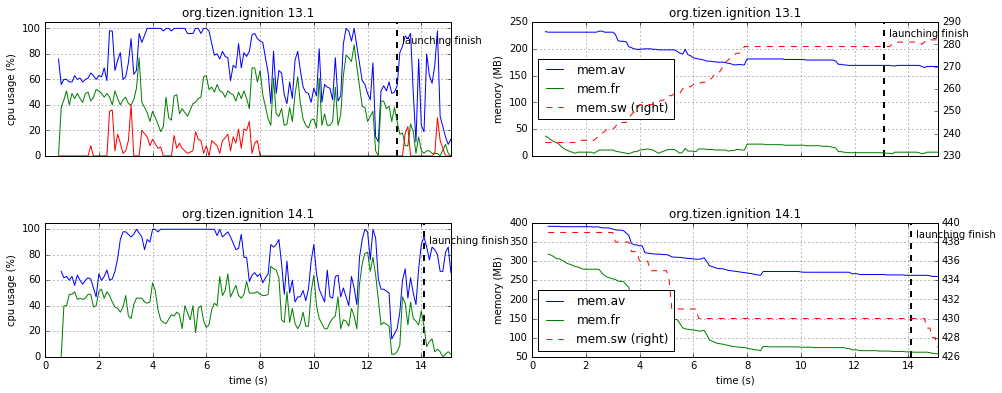

In [37]:
PreReclaim.compare("../log/20170523/pr_disabled_20170523_162342.txt", 
                   "../log/20170523/pr_enabled_20170523_164541.txt", 
                   4)